In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv("nearest-earth-objects(1910-2024).csv")

In [79]:
df.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


# Cleaning the data

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


In [81]:
df = df.dropna(subset=['absolute_magnitude','estimated_diameter_min','estimated_diameter_max'])

In [82]:
df.isnull().sum()

neo_id                    0
name                      0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
orbiting_body             0
relative_velocity         0
miss_distance             0
is_hazardous              0
dtype: int64

# EDA

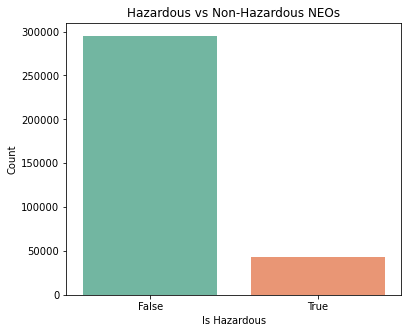

In [83]:
# Plotting the number of hazardous vs. non-hazardous NEOs
plt.figure(figsize=(6, 5))
sns.countplot(x='is_hazardous', data=df, palette='Set2')
plt.title('Hazardous vs Non-Hazardous NEOs')
plt.xlabel('Is Hazardous')
plt.ylabel('Count')
plt.show()

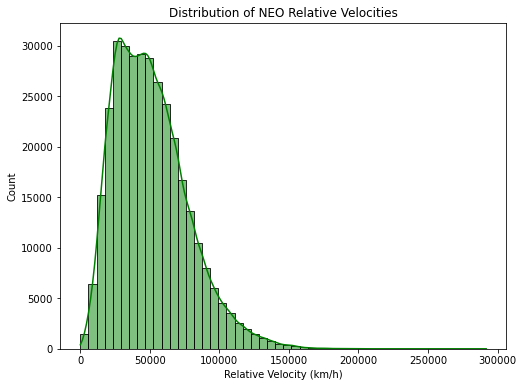

In [84]:
# Plotting the distribution of NEO relative velocities
plt.figure(figsize=(8, 6))
sns.histplot(df['relative_velocity'], bins=50, color='green', kde=True)
plt.title('Distribution of NEO Relative Velocities')
plt.xlabel('Relative Velocity (km/h)')
plt.show()

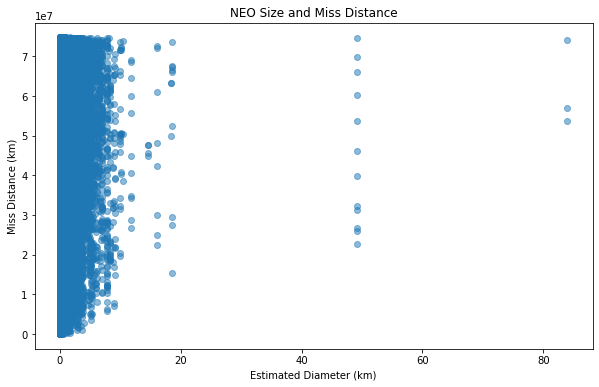

In [85]:
# Scatter Plot: NEO Size and Miss Distance
plt.figure(figsize=(10,6))
plt.scatter(df['estimated_diameter_max'], df['miss_distance'], alpha=0.5)
plt.title('NEO Size and Miss Distance')
plt.xlabel('Estimated Diameter (km)')
plt.ylabel('Miss Distance (km)')
plt.show()

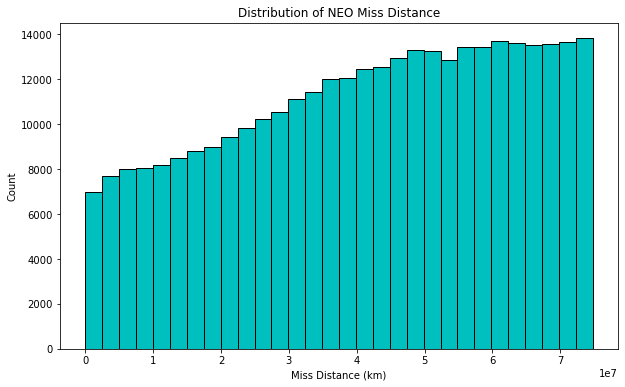

In [86]:
# Histogram: NEO Miss Distance
plt.figure(figsize=(10,6))
plt.hist(df['miss_distance'], bins=30, color='c', edgecolor='black')
plt.title('Distribution of NEO Miss Distance')
plt.xlabel('Miss Distance (km)')
plt.ylabel('Count')
plt.show()

# Data Preprocessing

## feature selection

In [87]:
df.drop(["orbiting_body","neo_id","name"], axis=1, inplace=True)# neo_id, name colomn not useful for predicting the target variable
                                                                # orbiting_body colomn has no numerical values

In [88]:
df.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


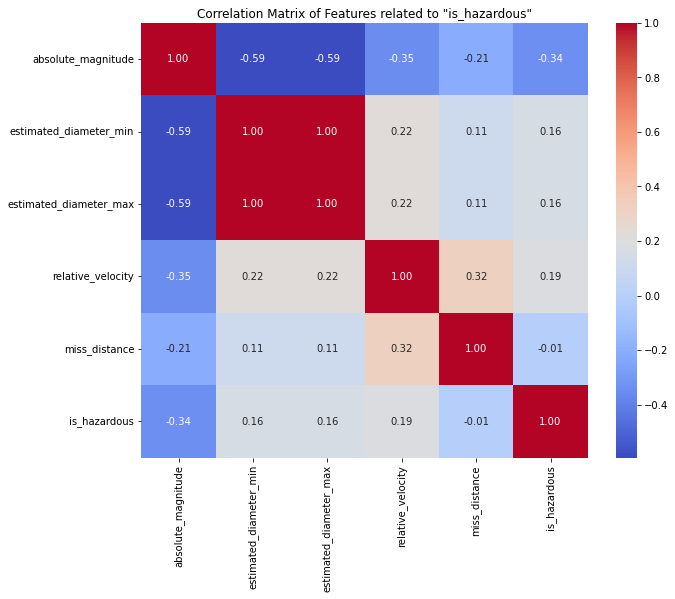

In [89]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features related to "is_hazardous"')
plt.show()

In [90]:
importances = rf_model.feature_importances_
feature_names = X.columns

In [91]:
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

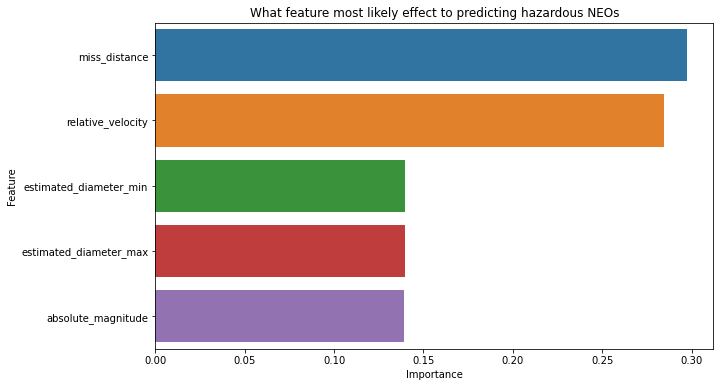

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('What feature most likely effect to predicting hazardous NEOs')
plt.show()

# Model Training

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X = df.drop(columns=['is_hazardous'])  #Features
y = df['is_hazardous']   #Target

In [95]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [96]:
# Using Random Forest Algo
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf_model = RandomForestClassifier(random_state=42)      
rf_model.fit(X_train, y_train)   #

RandomForestClassifier(random_state=42)

# Model Evaluation

In [98]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [99]:
y_pred = rf_model.predict(X_test)   #predictions on the test data

In [100]:
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred)) #Evaluating
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.9166108110239325

Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.97      0.95     88613
        True       0.71      0.58      0.64     12839

    accuracy                           0.92    101452
   macro avg       0.82      0.77      0.80    101452
weighted avg       0.91      0.92      0.91    101452

